In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load data
raw_data = pd.read_csv('Automobile_data.csv')

In [3]:
unprocessed = raw_data.copy()

In [4]:
unprocessed.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [5]:
#Identify missing variables
unprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
# Grouping string datatypes
strings = unprocessed.columns[unprocessed.dtypes == 'object']

In [7]:
#Printing out the amount of columns that has a question mark
print(f"{'Variable':^{15}}{'Total Missing':^{50}}{'% Missing':^{10}}")
for i in strings:
    print(f"{i:{25}}{(unprocessed[i] == '?').sum():^{30}}{((unprocessed[i] == '?').sum()*100/unprocessed.shape[0]).round(2):^{30}}")

   Variable                      Total Missing                   % Missing 
normalized-losses                      41                           20.0             
make                                   0                            0.0              
fuel-type                              0                            0.0              
aspiration                             0                            0.0              
num-of-doors                           2                            0.98             
body-style                             0                            0.0              
drive-wheels                           0                            0.0              
engine-location                        0                            0.0              
engine-type                            0                            0.0              
num-of-cylinders                       0                            0.0              
fuel-system                            0                        

In [8]:
# Drop missing price rows since it is only 4 missing values
unprocessed = unprocessed[unprocessed['price'] != '?']

In [9]:
# Drop missing num-of-doors rows since it is only 2 missing values
unprocessed = unprocessed[unprocessed['num-of-doors'] != '?']

In [10]:
#Printing out the amount of columns that has a question mark
print(f"{'Variable':^{15}}{'Total Missing':^{50}}{'% Missing':^{10}}")
for i in strings:
    print(f"{i:{25}}{(unprocessed[i] == '?').sum():^{30}}{((unprocessed[i] == '?').sum()*100/unprocessed.shape[0]).round(2):^{30}}")

   Variable                      Total Missing                   % Missing 
normalized-losses                      36                          18.09             
make                                   0                            0.0              
fuel-type                              0                            0.0              
aspiration                             0                            0.0              
num-of-doors                           0                            0.0              
body-style                             0                            0.0              
drive-wheels                           0                            0.0              
engine-location                        0                            0.0              
engine-type                            0                            0.0              
num-of-cylinders                       0                            0.0              
fuel-system                            0                        

In [11]:
#Printing out the number of uniques

for i in strings:
    print(f"{i}\n{unprocessed[i].unique()}")
    print()

normalized-losses
['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']

make
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']

fuel-type
['gas' 'diesel']

aspiration
['std' 'turbo']

num-of-doors
['two' 'four']

body-style
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

drive-wheels
['rwd' 'fwd' '4wd']

engine-location
['front' 'rear']

engine-type
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf']

num-of-cylinders
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']

fuel-system
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']

bore
['3.47' '2.68' '3.19' '3.13' '3.5' '3

In [12]:
# Convert certain object datatypes to int64,float and use 0 as a placeholder
i64 = unprocessed[['normalized-losses','horsepower', 'peak-rpm','price']]
f = unprocessed[['bore','stroke']]

for j in i64:
    try:
        unprocessed[j] = unprocessed[j].astype('int64')
    except:
        unprocessed[j] = unprocessed[j].replace('?',0).astype('int64')
for k in f:
    try:
        unprocessed[k] = unprocessed[k].astype('float')
    except:
        unprocessed[k] = unprocessed[k].replace('?',0).astype('float')


In [13]:
med = unprocessed[unprocessed['normalized-losses'] != 0]['normalized-losses'].median()

In [14]:
unprocessed['normalized-losses'] = unprocessed['normalized-losses'].replace(0,med)

In [15]:
# Get Dummies 

dummy_1 = pd.get_dummies(unprocessed[['fuel-type','aspiration','num-of-doors','engine-location']],drop_first=True)

In [16]:
# Add new dummies to dataframe

unprocessed = pd.concat([unprocessed,dummy_1],axis=1)

In [17]:
#Drop original columns
unprocessed = unprocessed.drop(['fuel-type','aspiration','num-of-doors',
             'engine-location'],axis=1)

In [18]:
unprocessed

,symboling,normalized-losses,make,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,fuel-type_gas,aspiration_turbo,num-of-doors_two,engine-location_rear
0,3,115,alfa-romero,convertible,rwd,88.6,168.8,64.1,48.8,2548,...,9.0,111,5000,21,27,13495,1,0,1,0
1,3,115,alfa-romero,convertible,rwd,88.6,168.8,64.1,48.8,2548,...,9.0,111,5000,21,27,16500,1,0,1,0
2,1,115,alfa-romero,hatchback,rwd,94.5,171.2,65.5,52.4,2823,...,9.0,154,5000,19,26,16500,1,0,1,0
3,2,164,audi,sedan,fwd,99.8,176.6,66.2,54.3,2337,...,10.0,102,5500,24,30,13950,1,0,0,0
4,2,164,audi,sedan,4wd,99.4,176.6,66.4,54.3,2824,...,8.0,115,5500,18,22,17450,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,sedan,rwd,109.1,188.8,68.9,55.5,2952,...,9.5,114,5400,23,28,16845,1,0,0,0
201,-1,95,volvo,sedan,rwd,109.1,188.8,68.8,55.5,3049,...,8.7,160,5300,19,25,19045,1,1,0,0
202,-1,95,volvo,sedan,rwd,109.1,188.8,68.9,55.5,3012,...,8.8,134,5500,18,23,21485,1,0,0,0
203,-1,95,volvo,sedan,rwd,109.1,188.8,68.9,55.5,3217,...,23.0,106,4800,26,27,22470,0,1,0,0


In [19]:
# The multi-port fuel injection is the most commonly used fuel system

unprocessed['fuel-system'].value_counts()

mpfi    91
2bbl    64
idi     19
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

In [20]:
# Sedan was the most common vehicle in the yearbook 

unprocessed['body-style'].value_counts()

sedan          92
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [21]:
# The most common car seen was the front wheel drive

unprocessed['drive-wheels'].value_counts()

fwd    116
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

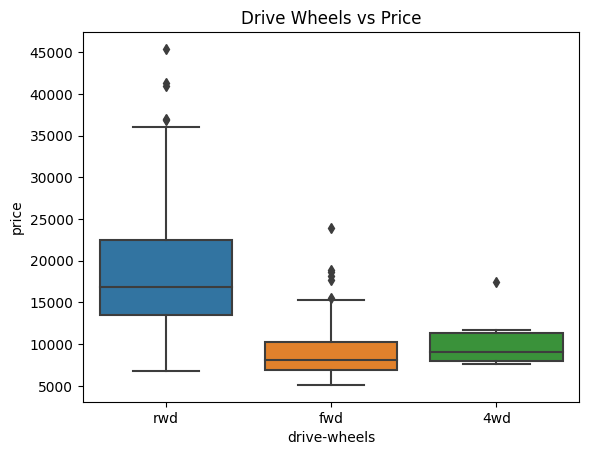

In [22]:
# The rear wheel drive seems to show up in vehicles that are more expensive, whereas fwd seems much 
# more affordable for consumers

sns.boxplot(data=unprocessed,x='drive-wheels',y='price')
plt.title('Drive Wheels vs Price')
plt.show()

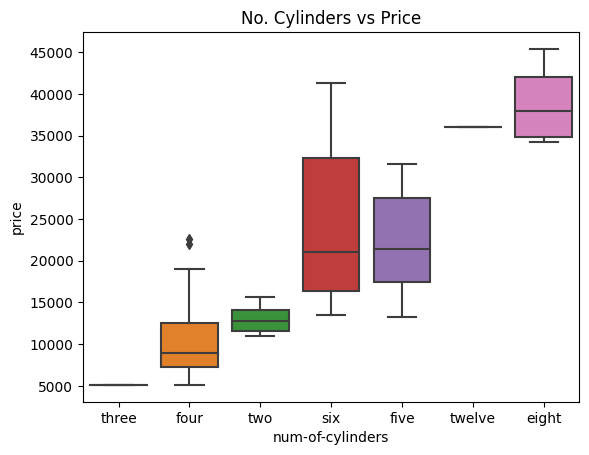

In [23]:
# Number of Cylinders vs Price
sns.boxplot(data=unprocessed,x='num-of-cylinders',y='price',order=['three','four','two','six','five',
                                                                       'twelve','eight'])
plt.title('No. Cylinders vs Price')
plt.show()

In [24]:
# From what was online, there are pros/cons when it comes to cylinders. I did have a difficult time
# finding more information on this, but I believe it is mainly my lack of knowledge regarding the world
# of automobiles. This prevented me from using proper keywords or terminologies needed to find the answer to
# my question.

# Going by the graph, the more cylinders inside a vehicle the higher the price.

In [25]:
# Decided to just keep the num-of-cylinders and change it to int 64
unprocessed['num-of-cylinders'] = unprocessed['num-of-cylinders'].map({'four':4, 'six':6, 
                                                'five':5,'three':3,'twelve':12, 'two':2, 'eight':8})

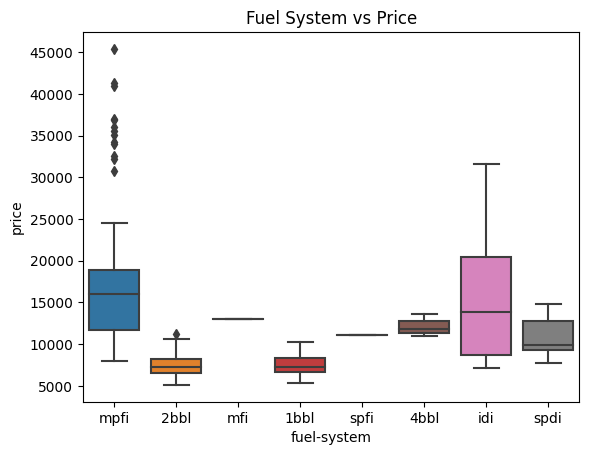

In [26]:
# mpfi is the most commonly used in vehicles now, so I'm assuming 
# there is a possiblity that many cars used that type of fuel injection
sns.boxplot(data=unprocessed,x='fuel-system',y='price')
plt.title('Fuel System vs Price')
plt.show()

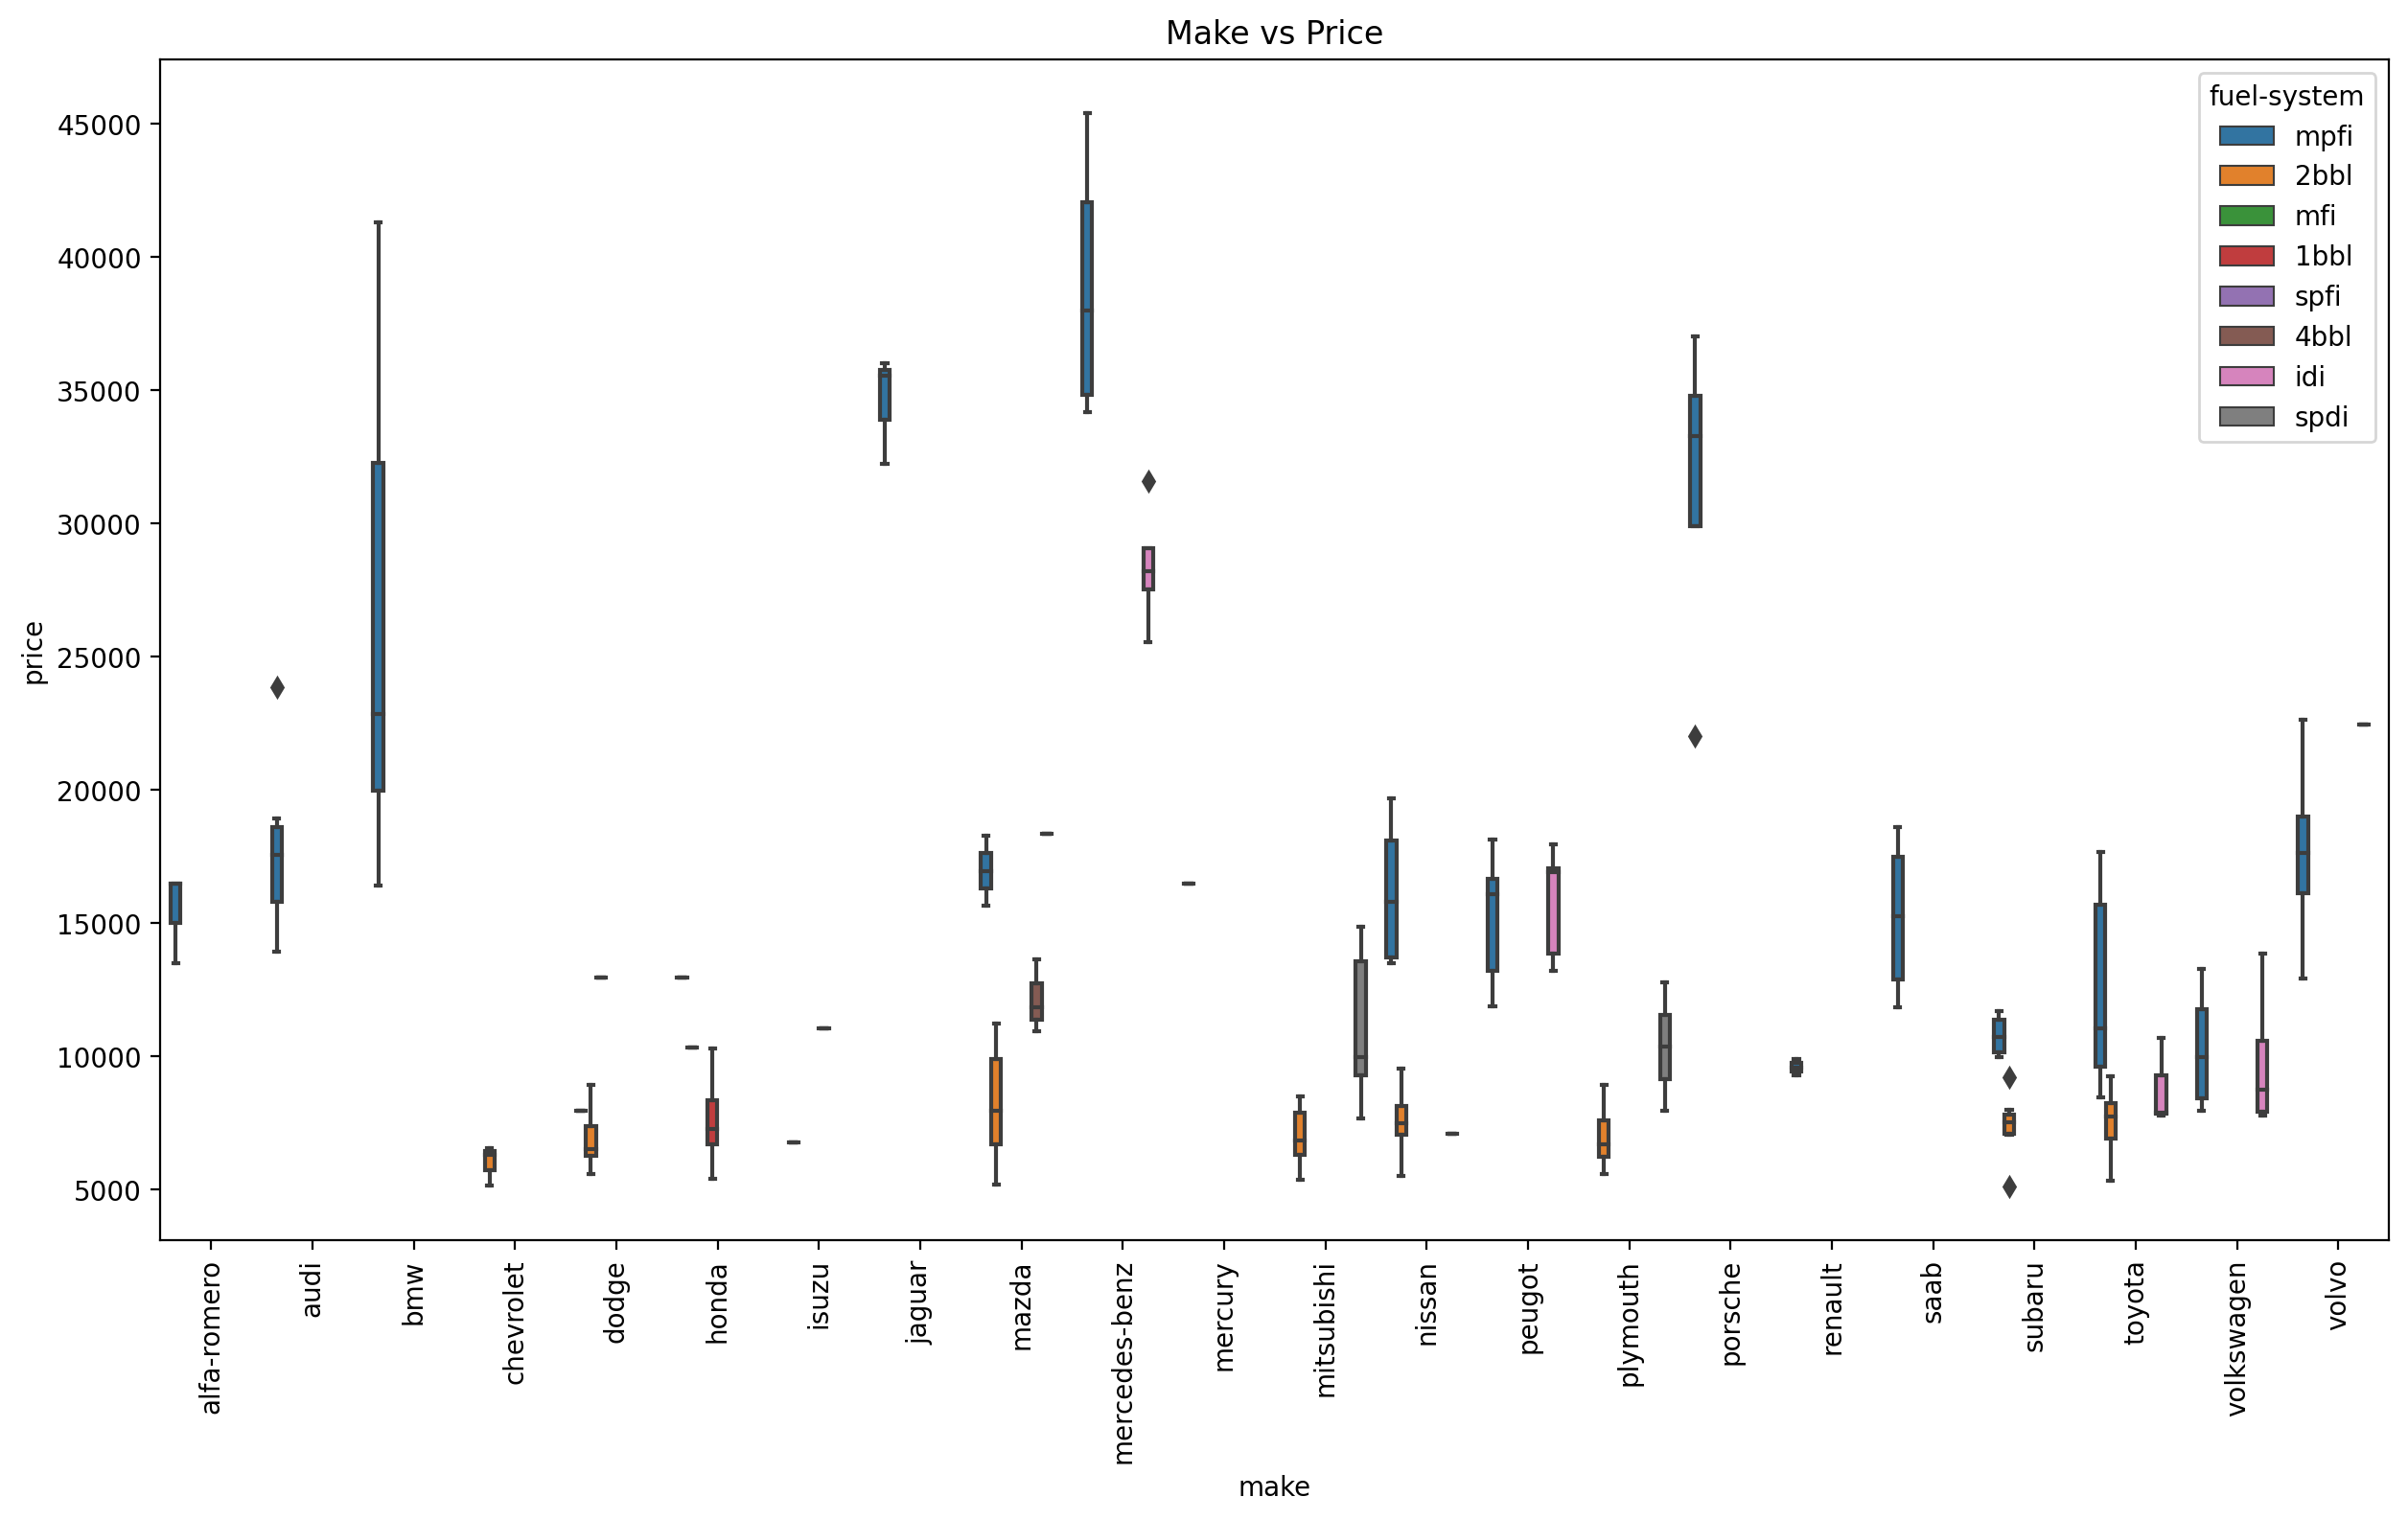

In [27]:
# From the graph itself it seems that the more expensive brands tend to have a mpfi fuel-system
plt.figure(figsize=(15,8),dpi=200)
sns.boxplot(data=unprocessed,x='make',y='price',hue='fuel-system')
plt.title('Make vs Price')
plt.xticks(rotation=90)
plt.show()

In [28]:
# Get Dummies 

dummy_2 = pd.get_dummies(unprocessed['drive-wheels'],drop_first=True)

In [29]:
unprocessed = pd.concat([unprocessed,dummy_2],axis=1)

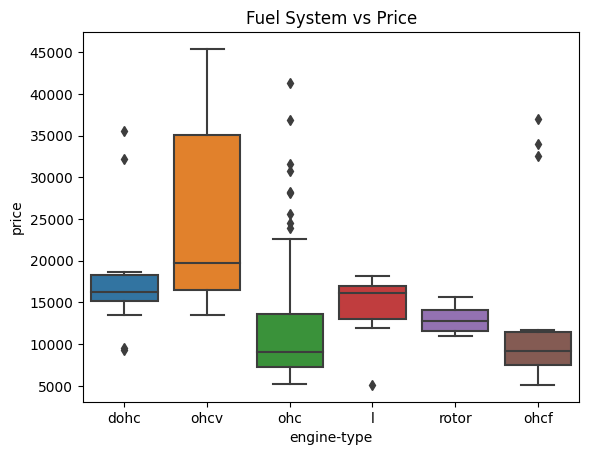

In [30]:
sns.boxplot(data=unprocessed,x='engine-type',y='price')
plt.title('Fuel System vs Price')
plt.show()

In [31]:
# Drop make,body-style,engine-type, and drive-wheels
unprocessed = unprocessed.drop(['drive-wheels','make','engine-type','body-style','fuel-system'],axis=1)